# Gesamtantwort ohne Dämpfung
[Aufgabenstellung](calculations/%C3%9Cbungen_3-5_EMS.pdf)

## Versteifter Rahmen mit angehängter Werkzeugmaschine

![Statisches System](pictures/ems_4.jpg){#fig-system_maschine}

In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit

import matplotlib.pyplot as plt

## Parameter der Aufgabenstellung


In [2]:
params = {              
          'm_tot':5000*unit.N*unit.second**2/unit.m, 
          'E':210*10**3*unit.N/unit.mm**2,
          'H':4000*unit.mm,
          'B':6000*unit.mm,
          '\oslash_Diag':12*unit.mm,
          'f_yd':338*unit.N/unit.mm**2,
          'm_1':200*unit.N*unit.second**2/unit.m,
          'n':150/unit.minute,
          'e':0.1*unit.m,
          'zeta':0.0,
          }

params_plot = convert.param_value(params=params)
render.dict_render(params)

Eq(m_tot, 5000*newton*second**2/meter)

Eq(E, 210000*newton/millimeter**2)

Eq(H, 4000*millimeter)

Eq(B, 6000*millimeter)

Eq(\oslash_Diag, 12*millimeter)

Eq(f_yd, 338*newton/millimeter**2)

Eq(m_1, 200*newton*second**2/meter)

Eq(n, 150/minute)

Eq(e, 0.1*meter)

Eq(zeta, 0.0)

In [3]:
m_tot, E, H, B, Diam, f_yd, m_1, n, e = sp.symbols('m_tot, E, H, B, \oslash_Diag, f_yd, m_1, n, e')

F_0, omega, t, zeta = sp.symbols('F_0, omega, t, zeta')

In [4]:
F_t = F_0 * sp.cos(omega*t)

render.eq_display('F(t)', F_t)

Eq(F(t), F_0*cos(omega*t))

## Systemsteifigkeit

Zur Ermittlung der Eigenkreisfrequenz wird die Steifigkeit des gesamten Systems benötigt.

![Verformungszustand des Systems für die Einheitskraft](pictures/auslenkunf_FW.jpg){#fig-verform_FW}

Das System wird mit einer Einheitskraft belastet. Aufgrund der Eigenschaften der Pendelstäbe (lediglich Normalkräfte) und deren unendlich grossen Dehnsteifigkeit, spielt lediglich die Verformung der Diagonalen eine Rolle. Dazu gilt, dass die Diagonalen lediglich Zugkräfte aufnehmen können. Das bedeutet, dass lediglich ein Stab aktiv ist für die beschrieben Situation in @fig-verform_FW.

Dazu muss die Normalkraft in der Diagonalen bestimmt werden.

In [5]:
alpha = sp.atan(H/B)

Z_Diag = 1000*unit.N /sp.cos(alpha)


render.eq_display('alpha', alpha,
                  'alpha', alpha.subs(params).evalf(3),
                  'Z_Diag', Z_Diag,
                  'Z_Diag',Z_Diag.subs(params).evalf(3))

Eq(alpha, atan(H/B))

Eq(alpha, 0.588)

Eq(Z_Diag, 1000*newton*sqrt(1 + H**2/B**2))

Eq(Z_Diag, 1.2e+3*newton)

Mittels der Arbeitsgleichung lässt sich die Verformung bestimmen. Für die Integration zweier Normalkraftverläufe gilt die folgende Beziehung:

$$u = \frac{1}{EA_{Diag}}  \int_{0}^{l_{Diag}} N_x\bar{N_x} \,dx$$



In [6]:
l_Diag = B /sp.cos(alpha)
A_Diag = sp.pi * Diam**2 / 4
u_for_k = 1/(E*A_Diag) * Z_Diag * Z_Diag/(1000*unit.N) * l_Diag

k = 1000*unit.N / u_for_k
render.eq_display('l_Diag', l_Diag,
                  'l_Diag', unit.convert_to(l_Diag.subs(params).evalf(3), unit.m),
                  'A_Diag', A_Diag,
                  'A_Diag', A_Diag.subs(params).evalf(3),
                  'u_k', u_for_k,
                  'u_k', u_for_k.subs(params).evalf(3),
                  'k', 'F/u_k',
                  'k', k.subs(params).evalf(3))

Eq(l_Diag, B*sqrt(1 + H**2/B**2))

Eq(l_Diag, 7.21*meter)

Eq(A_Diag, pi*\oslash_Diag**2/4)

Eq(A_Diag, 113.0*millimeter**2)

Eq(u_k, 4000*newton*B*(1 + H**2/B**2)**(3/2)/(pi*E*\oslash_Diag**2))

Eq(u_k, 0.439*millimeter)

Eq(k, F/u_k)

Eq(k, 2.28e+3*newton/millimeter)

## Eigenkreisfrequenz

Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$\omega_n =\sqrt{\frac{k}{m}}$$

In [7]:
omega_n = sp.sqrt(k/m_tot)

render.eq_display('omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

Eq(omega_n, sqrt(pi)*sqrt(E*\oslash_Diag**2/(B*m_tot*(1 + H**2/B**2)**(3/2)))/2)

Eq(omega_n, 21.4/second)

## Dynamischer Vergrösserungsfaktor

### Anregungsfunktion

Zur Bestimmung des dynamischen Vergrösserungsfaktor wird die stationäre Verformung benötigt.  Diese lässt sich aus der Anfangskraft der Anregungsfunktion ermitteln. Dazu wird diese Funktion benötigt. Wir wissen die Drehzahl $n$ und die Exzentrizität $e$ sowie deren Masse $m_1$.

In [8]:
f = unit.convert_to(n.subs(params),unit.second)
omega = 2*sp.pi*f
params['omega'] = omega.subs(params).simplify()

render.eq_display('f', 'n',
                  'f', f.evalf(3),
                  'omega', '2*pi*f',
                  'omega', omega.evalf(3),
                  )

Eq(f, n)

Eq(f, 2.5/second)

Eq(omega, 2*pi*f)

Eq(omega, 15.7/second)

Nun fehlt lediglich die Anfangskraft $F_0$. Die Fliehkraft F der 2 gegenläufig rotierenden Massen bewirken eine addierende Fliehkraft in horizontaler Richtung zu:

$$F_0 = 2(m_1 *e *\omega^2)$$


In [9]:
F_0 = 2*(m_1*e*omega**2)
params['F_0'] = F_0.subs(params).simplify()
render.eq_display('F_0', F_0,
                  'F_0', F_0.subs(params).simplify().evalf(3))

Eq(F_0, 50*pi**2*e*m_1/second**2)

Eq(F_0, 9.87e+3*newton)

### Statische Deformation

Die statische Deformation lässt sich nun leicht anhand der ermittelten Systemsteifigkeit herleiten.

In [10]:
u_0 = F_0/k

render.eq_display('u_0', u_0.subs(params).simplify().evalf(3))

Eq(u_0, 4.33*millimeter)

### Vergrösserungsfaktor

In [11]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

Eq(V(omega), 1/sqrt(4*omega**2*zeta_**2/omega_n**2 + (-omega**2/omega_n**2 + 1)**2))

Eq(V(omega), 2.18)

## Stationäre Antwort

Es handelt sich um einen ungedämpften Einmassenschwinger mit einer harmonischen Anregungsfunktion. Die Bewegungsgleichung ist die folgende:

$$mu''(t)+ ku(t) = F(t)$$

Dies ist eine inhomogene Differentialgleichung 2. Ordnung. Die Lösung dieser lässt sich in einen partikulären Anteil und in einen homogenen Anteil aufteilen. Der partikuläre Anteil entspricht der stationären Antwort. Der homogene Anteil nennt sich transienter Anteil. Wäre eine Dämpfung im System vorhanden, so startet der Schwungvorgang aus einer Kombination beider Teile. Aufgrund der Dämpfung verschwindet der stationäre Anteil und das System wird schlussendlich nur noch durch den transienten Anteil deformiert. 

Anhand des Vergrösserungsfaktor kann die stationäre dynamische Antwort des Systems mit der folgenden Beziehung ermittelt werden.

$$u_p = V(\omega)u_0 * \cos{(\omega t)}$$



In [12]:
u_p = V_omega * u_0 *sp.cos(omega *t)

render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

Eq(u_p, 9.43*millimeter*cos(5*pi*t/second))

## Gesamtantwort

Für die Gesamtantwort wird nun noch der homogene Anteil benötigt. Dazu ist die folgende Differentialgleichung zu lösen.

$$mu''(t)+ ku(t) = 0$$

Als Ansatzfunktion dient die folgende Gleichung:

$$u_h = A_1\cos{(\omega_n t)} + A_2 \sin{(\omega_n t)}$$


Die Randbedingungen sind in der Aufgabenstellung definiert und sind die folgenden:

$u(t=0)=0$

$u'(t=0)=0$

Vorsicht, die Randbedingungen gelten für die gesamte Lösung:

$$u(t) = u_h(t) + u_p(t)$$

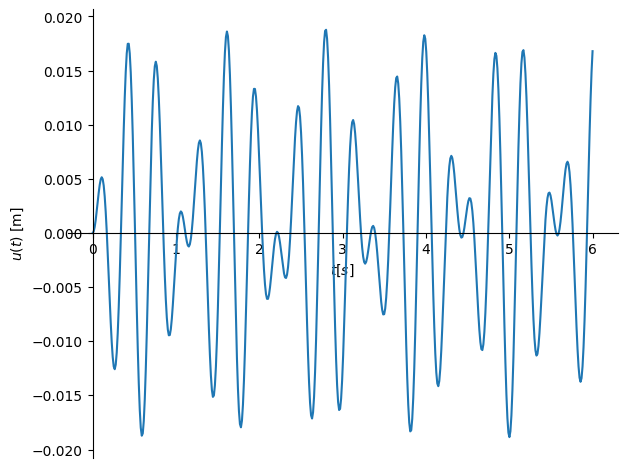

In [13]:
#| label: fig-gesamtantwort_ems4
#| fig-cap: "Gesamtantwort"


A_1, A_2 = sp.symbols('A_1:3')

u_h_ansatz = A_1 * sp.cos(omega_n*t)+A_2*sp.sin(omega_n*t)
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h + u_p

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)

sp.plot(u_t_plot, (t,0,6), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]')

plt.show()

## Festigkeitsnachweis

Aufgrund der maximalen Auslenkung, kann die maximale Normalkraft auf der Diagonalen bestimmt werden.

### Maximale Auslenkung

Aus dem Plot in @fig-gesamtantwort_ems4 besteht eine maximale Auslenkung zum Beispiel im Zeitpunkt $t=5s$. Dies wird hier numerisch gelöst.

In [14]:
t_max_auslenkung = sp.nsolve(sp.diff(u_t_plot,t), t,(2.6,2.8))

u_max = u_t_plot.subs(t,t_max_auslenkung)


render.eq_display('t_max', t_max_auslenkung,
                  'u_max', u_max.evalf(3))

Eq(t_max, 2.79684750068608)

Eq(u_max, 0.0188)

### Maximale Einwirkung

Aufgrund der maximalen Amplitude verlängert sich die Diagonale um $\Delta l$. Die Dehnung des Stabs ist somit die $\frac{\Delta l}{l_{Diag}}$. Bei linear elastischem Materialverhalten gilt die folgende Beziehung:

$$\sigma = \varepsilon E$$

In [16]:
epsilon = u_max*unit.m / sp.cos(alpha) / l_Diag
sigma = epsilon*E

Nachweis = sigma / f_yd

render.eq_display('epsilon', epsilon.subs(params).simplify().evalf(3),
                  'sigma', unit.convert_to(sigma.subs(params).simplify().evalf(3), unit.mm**2),
                  'f_yd', f_yd.subs(params),
                  'Nachweis', 'sigma / f_yd',
                  'Nachweis', Nachweis.subs(params).simplify().evalf(3))

Eq(epsilon, 0.00314)

Eq(sigma, 659.0*newton/millimeter**2)

Eq(f_yd, 338*newton/millimeter**2)

Eq(Nachweis, sigma/f_yd)

Eq(Nachweis, 1.95)

Die Diagonale würde plastifizieren, so dass die linearen Annahmen für die Berechnung der Systemsantwort
nicht angewendet dürfen.